In [869]:
import numpy as np
import graphlab as gl
import re

train_data = gl.SFrame('train.csv')
test_data = gl.SFrame('test.csv')
gender_data = gl.SFrame('gender_submission.csv')

full_data = (train_data,test_data)

Finished parsing file /Users/ahmedaleshinloye/Documents/Machine learning Project/Titanic/train.csv

Parsing completed. Parsed 100 lines in 0.044121 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,str,str,float,int,int,str,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/ahmedaleshinloye/Documents/Machine learning Project/Titanic/train.csv

Parsing completed. Parsed 891 lines in 0.021332 secs.

Finished parsing file /Users/ahmedaleshinloye/Documents/Machine learning Project/Titanic/test.csv

Parsing completed. Parsed 100 lines in 0.020557 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,str,float,int,int,str,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/ahmedaleshinloye/Documents/Machine learning Project/Titanic/test.csv

Parsing completed. Parsed 418 lines in 0.016766 secs.

Finished parsing file /Users/ahmedaleshinloye/Documents/Machine learning Project/Titanic/gender_submission.csv

Parsing completed. Parsed 100 lines in 0.016601 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/ahmedaleshinloye/Documents/Machine learning Project/Titanic/gender_submission.csv

Parsing completed. Parsed 418 lines in 0.020449 secs.

In [870]:
(train_data.groupby(key_columns='Pclass', operations={'count': gl.aggregate.AVG('Survived')}))

Pclass,count
2,0.472826086957
3,0.242362525458
1,0.62962962963


Shows most people in Pclass 1 survived

In [871]:
(train_data.groupby(key_columns='Sex', operations={'count': gl.aggregate.AVG('Survived')}))

Sex,count
male,0.188908145581
female,0.742038216561


Shows more female survived 

In [872]:
for data in full_data:
    data['family_size'] = data['SibSp'] + data['Parch'] + 1
(train_data.groupby(key_columns='family_size', operations={'count': gl.aggregate.AVG('Survived')}))

family_size,count
2,0.552795031056
8,0.0
5,0.2
4,0.724137931034
3,0.578431372549
1,0.303538175047
7,0.333333333333
6,0.136363636364
11,0.0


In [873]:
def is_Alone(d):
    if d==1: 
        return 1
    else:
        return 0

for data in full_data:
    data['Alone'] =  data['family_size'].apply(is_Alone)
(train_data.groupby(key_columns='Alone', operations={'count': gl.aggregate.AVG('Survived')}))

Alone,count
0,0.505649717514
1,0.303538175047


In [874]:
def search_title(Name):
    matchOBJ = re.search("[a-zA-z]+\.",Name)
    return matchOBJ.group(0)

for data in full_data:
    data['Title'] =  data['Name'].apply(search_title)
    
(train_data.groupby(key_columns='Title', operations={'count': gl.aggregate.AVG('Survived')})).print_rows(num_rows=17, num_columns=2)

+-----------+----------------+
|   Title   |     count      |
+-----------+----------------+
|    Mrs.   |     0.792      |
|   Mlle.   |      1.0       |
|    Rev.   |      0.0       |
|    Don.   |      0.0       |
|    Col.   |      0.5       |
|    Dr.    | 0.428571428571 |
|  Master.  |     0.575      |
|    Mme.   |      1.0       |
|    Sir.   |      1.0       |
|   Major.  |      0.5       |
|   Miss.   | 0.697802197802 |
| Jonkheer. |      0.0       |
|   Lady.   |      1.0       |
|    Ms.    |      1.0       |
|    Mr.    | 0.15667311412  |
| Countess. |      1.0       |
|   Capt.   |      0.0       |
+-----------+----------------+
[17 rows x 2 columns]



In [875]:
def change_name(val):
    if (val == 'Mlle.') or (val =='Ms.'):
        return 'Miss'
    elif val == 'Mme.':
        return 'Mrs'
    elif val == 'Master.':
        return 'Master'
    elif val == 'Miss.':
        return 'Miss'
    elif val == 'Mrs.':
        return 'Mrs'
    elif val == 'Mr.':
        return 'Mr'
    else:
        return 'Rare'
    
for data in full_data:
    data['Title'] =  data['Title'].apply(change_name)


In [876]:
def Title(title):
    if title == 'Mrs':
        return 1
    elif title =='Miss':
        return 2
    elif title =='Master':
        return 3
    elif title == 'Mr':
        return 4
    elif title =='Rare':
        return 5
    
for data in full_data:
    data['Title'] =  data['Title'].apply(Title)

In [877]:
def Sex_categorical(sex):
    if sex == 'female':
        return 1
    elif sex == 'male':
        return 2
for data in full_data:
    data['Sex'] =  data['Sex'].apply(Sex_categorical)

In [878]:
train_data.groupby(key_columns='Embarked', operations={'count': gl.aggregate.AVG('Survived')})

Embarked,count
,1.0
S,0.336956521739
C,0.553571428571
Q,0.38961038961


In [879]:
def Embarked_categorical(Embarked):
    if Embarked == 'C':
        return 1
    elif Embarked == 'Q':
        return 2
    elif Embarked == 'S':
        return 3
for data in full_data:
    data['Embarked'] =  data['Embarked'].apply(Embarked_categorical)

train_data = train_data.fillna('Embarked',3)

In [880]:
binner = gl.feature_engineering.create(train_data, gl.toolkits.feature_engineering.FeatureBinner(features = ['Fare'], strategy = 'quantile',num_bins=5))
train_data = binner.transform(train_data)
test_data = binner.transform(test_data)
full_data = (train_data,test_data)

In [881]:
train_data.groupby(key_columns='Fare', operations={'count': gl.aggregate.AVG('Survived')})
def Fare_categorical(Fare):
    if Fare == 'Fare_4':
        return 1
    elif Fare == 'Fare_3':
        return 2
    elif Fare == 'Fare_1':
        return 3
    elif Fare == 'Fare_2':
        return 4
    elif Fare =='Fare_0':
        return 5

for data in full_data:
    data['Fare'] =  data['Fare'].apply(Fare_categorical)
    
test_data = test_data.fillna('Fare',5)

In [882]:
def check_None(data, average,i):   
    if (data['Age'] == None) & (data['Pclass'] == (i+1)):
        return average
    else:
        return data['Age']
        
avg_val = np.zeros(3,)

train = gl.SFrame()
for i in range(3):
    avg_val[i] = np.median(train_data[train_data['Pclass']== i+1]['Age'])    

for i in range(3):
    value = train_data[train_data['Pclass']== i+1]
    value['Age'] = value.apply(lambda x: check_None(x,avg_val[i],i))
    train = train.append(value)
    
avg_val = np.zeros(3,)

test = gl.SFrame()
for i in range(3):
    avg_val[i] = np.median(test_data[test_data['Pclass']== i+1]['Age'])    

for i in range(3):
    value = test_data[test_data['Pclass']== i+1]
    value['Age'] = value.apply(lambda x: check_None(x,avg_val[i],i))
    test = test.append(value)

full_data = (train,test)
def Age(Age):
    if Age <= 16:
        return 1
    elif (Age > 16) & (Age <=32):
        return 2
    elif (Age > 32) & (Age <=48):
        return 3
    elif (Age > 48) & (Age <=64):
        return 4
    else:
        return 5

for data in full_data:
    data['Age'] =  data['Age'].apply(Age)

In [883]:
train = train.sort('PassengerId')
test = test.sort('PassengerId')
full_data = (train,test)

In [884]:
for data in full_data:
    data.remove_column('Ticket')
    data.remove_column('PassengerId')
    data.remove_column('Name')
    data.remove_column('Cabin')
    data.remove_column('SibSp')
    data.remove_column('Parch')

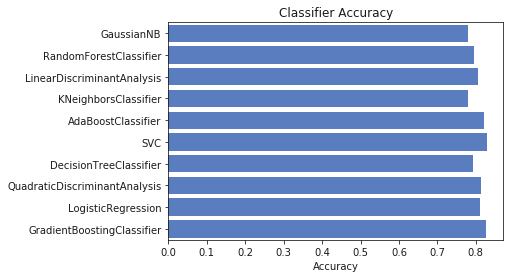

In [959]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]


sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = (train.to_numpy())[:,1:]
y = (train.to_numpy())[:,0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc


log = gl.SFrame({'Classifier':[], 'Accuracy':[]})
log['Classifier']= log['Classifier'].astype(str)
log['Accuracy']= log['Accuracy'].astype(float)
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = gl.SFrame({'Classifier':[clf], 'Accuracy':[acc_dict[clf]]})
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(log['Accuracy'].to_numpy(), log['Classifier'].to_numpy(), color="b")

In [975]:
log

Accuracy,Classifier
0.78,GaussianNB
0.795555555556,RandomForestClassifier
0.806666666667,LinearDiscriminantAnalysis ...
0.778888888889,KNeighborsClassifier
0.821111111111,AdaBoostClassifier
0.83,SVC
0.793333333333,DecisionTreeClassifier
0.814444444444,QuadraticDiscriminantAnalysis ...
0.811111111111,LogisticRegression
0.825555555556,GradientBoostingClassifier ...


In [965]:
final_classifier = SVC()
final_classifier = final_classifier.fit((train.to_numpy())[:,1:],(train.to_numpy())[:,0])
prediction = final_classifier.predict(test.to_numpy())

In [972]:
data = gl.SFrame({'PassengerId':gl.SArray(test_data['PassengerId']),'Survived':gl.SArray(prediction)})

In [974]:
data.save('submission.csv')